#Handwritten Digit Recognition

##importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

   label
0      5
1      0
2      4


<BarContainer object of 10 artists>

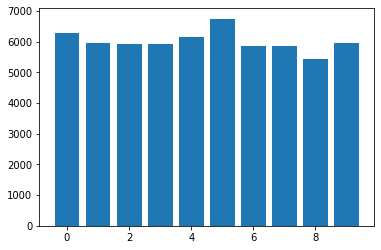

In [3]:
y=pd.DataFrame(y_train, columns=['label'])
print(y.head(3))
plt.bar(x=y['label'].unique(),height=y.value_counts())

5

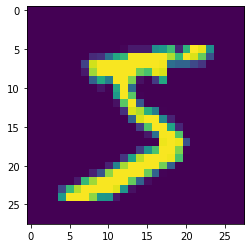

In [4]:
plt.imshow(x_train[0,:,:])
y_train[0]

In [5]:
x_train.min(), x_train.max()

(0, 255)

##ml model

In [ ]:
x=x_train.reshape([x_train.shape[0],-1])
x_t=x_test.reshape([x_test.shape[0],-1])

x.shape, x_t.shape

((60000, 784), (10000, 784))

###rfc

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()
parameters = {'max_depth':[1,10,100], 'n_estimators':[10,100,1000]}

grid = GridSearchCV(rfc, param_grid=parameters, cv=5)
grid.fit(x, y_train)

print("best parameters from train data: ",grid.best_params_)
print("train accuracy",grid.score(x, y_train))
print("test accuracy",grid.score(x_t, y_test))

best parameters from train data:  {'max_depth': 100, 'n_estimators': 1000}
train accuracy 1.0
test accuracy 0.9712


In [ ]:
y_pred = grid.predict(x_t)
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[ 969,    0,    0,    0,    0,    2,    3,    1,    4,    1],
       [   0, 1123,    3,    3,    0,    2,    2,    0,    1,    1],
       [   6,    0,  999,    7,    2,    0,    4,    8,    6,    0],
       [   0,    0,   10,  976,    0,    5,    0,    9,    8,    2],
       [   1,    0,    1,    0,  957,    0,    5,    0,    2,   16],
       [   3,    0,    1,   10,    3,  861,    5,    2,    5,    2],
       [   6,    3,    1,    0,    2,    3,  939,    0,    4,    0],
       [   1,    3,   19,    1,    0,    0,    0,  990,    2,   12],
       [   4,    0,    5,    6,    2,    6,    2,    4,  936,    9],
       [   5,    6,    2,   11,   10,    1,    1,    4,    7,  962]])

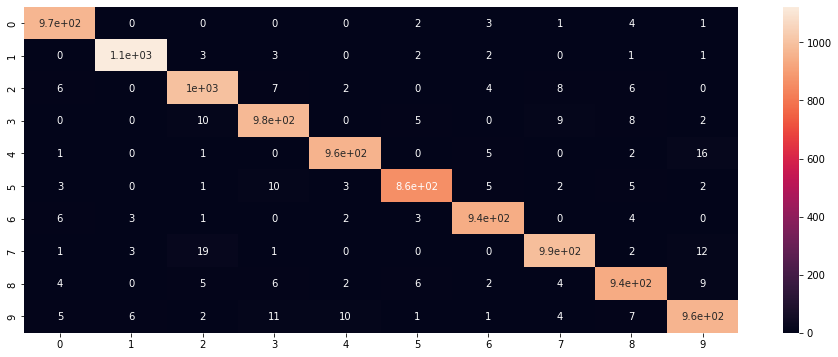

In [ ]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(matrix,annot=True)
plt.show()

###svc

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc=SVC(kernel='poly')
parameters = {'C':[0.001,0.1], 'gamma':[1]}

grid = GridSearchCV(svc, param_grid=parameters, cv=5)
grid.fit(x, y_train)

print("best parameters from train data: ",grid.best_params_)
print("train accuracy",grid.score(x, y_train))
print("test accuracy",grid.score(x_t, y_test))

best parameters from train data:  {'C': 0.001, 'gamma': 1}
train accuracy 1.0
test accuracy 0.9787


In [ ]:
y_pred = grid.predict(x_t)
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[ 972,    0,    1,    1,    0,    3,    1,    0,    2,    0],
       [   0, 1126,    2,    1,    1,    0,    3,    0,    2,    0],
       [   8,    0, 1006,    0,    2,    0,    5,    8,    3,    0],
       [   0,    2,    1,  987,    0,    6,    0,    5,    6,    3],
       [   2,    0,    2,    0,  965,    0,    3,    1,    0,    9],
       [   2,    0,    0,   10,    1,  867,    3,    1,    5,    3],
       [   4,    5,    1,    0,    3,    6,  937,    0,    2,    0],
       [   0,   10,    9,    2,    1,    0,    0, 1000,    0,    6],
       [   5,    0,    1,    3,    4,    4,    1,    4,  950,    2],
       [   3,    6,    1,    5,    9,    3,    1,    1,    3,  977]])

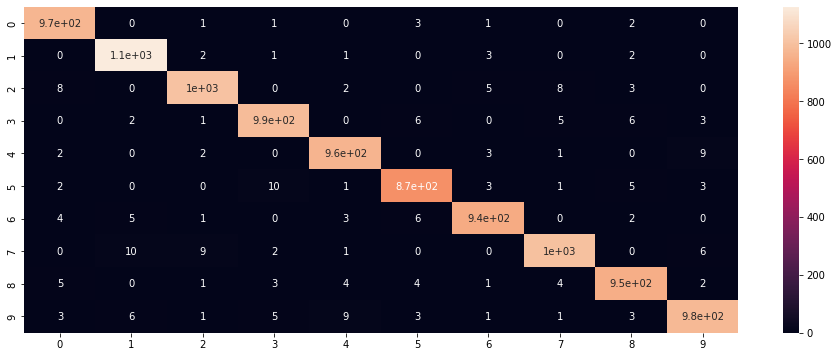

In [ ]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(matrix,annot=True)
plt.show()

##model cnn

In [6]:
x_train=x_train.reshape([-1,28,28,1])
x_test=x_test.reshape([-1,28,28,1])
y_train=y_train.reshape([-1,1])
y_test=y_test.reshape([-1,1])

x_train=x_train/255.0
x_test=x_test/255.0

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28, 1), (60000, 1)), ((10000, 28, 28, 1), (10000, 1)))

In [7]:
from sklearn.preprocessing import OneHotEncoder
y_train=OneHotEncoder().fit_transform(y_train).toarray()
y_test=OneHotEncoder().fit_transform(y_test).toarray()
y_train, y_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]), (60000, 10))

In [8]:
from keras.models import Sequential
from keras.layers import *
from keras import backend as K

model = Sequential()
model.add(Conv2D(32,kernel_size=(3, 3),activation='relu',input_shape=[28,28,1]))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [9]:
hist = model.fit(x_train,y_train,batch_size=64,epochs=15,
                 validation_split=0.4)

Epoch 1/15
563/563 [==============================] - 20s 16ms/step - loss: 0.2184 - accuracy: 0.9320 - val_loss: 0.0705 - val_accuracy: 0.9788
Epoch 2/15
563/563 [==============================] - 7s 13ms/step - loss: 0.0744 - accuracy: 0.9772 - val_loss: 0.0565 - val_accuracy: 0.9831
Epoch 3/15
563/563 [==============================] - 9s 15ms/step - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0503 - val_accuracy: 0.9854
Epoch 4/15
563/563 [==============================] - 7s 13ms/step - loss: 0.0443 - accuracy: 0.9857 - val_loss: 0.0492 - val_accuracy: 0.9856
Epoch 5/15
563/563 [==============================] - 7s 13ms/step - loss: 0.0343 - accuracy: 0.9883 - val_loss: 0.0468 - val_accuracy: 0.9870
Epoch 6/15
563/563 [==============================] - 7s 13ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0439 - val_accuracy: 0.9883
Epoch 7/15
563/563 [==============================] - 9s 15ms/step - loss: 0.0243 - accuracy: 0.9916 - val_loss: 0.0451 - val_accuracy: 0.988

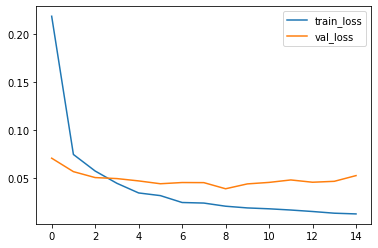

In [10]:
plt.plot(hist.history['loss'],label='train_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

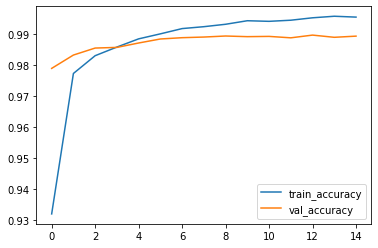

In [11]:
plt.plot(hist.history['accuracy'],label='train_accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [12]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

'test accuracy:',model.evaluate(x_test, y_test)[1]*100,'loss:',model.evaluate(x_test, y_test)[0]

313/313 [==============================] - 2s 5ms/step - loss: 0.0421 - accuracy: 0.9908


('test accuracy:', 99.08000230789185, 'loss:', 0.04207136109471321)

In [13]:
y_test=np.argmax(y_test,axis=1)
a=confusion_matrix(y_test,y_pred)
a

array([[ 976,    0,    0,    1,    0,    0,    1,    1,    1,    0],
       [   0, 1125,    2,    3,    0,    3,    0,    2,    0,    0],
       [   2,    0, 1026,    0,    1,    0,    0,    3,    0,    0],
       [   0,    0,    1, 1006,    0,    1,    0,    1,    1,    0],
       [   0,    0,    0,    0,  979,    0,    1,    0,    0,    2],
       [   1,    0,    1,    7,    0,  882,    1,    0,    0,    0],
       [   5,    2,    0,    0,    1,    5,  945,    0,    0,    0],
       [   0,    1,    5,    1,    1,    0,    0, 1018,    1,    1],
       [   3,    1,    3,    0,    2,    0,    0,    2,  958,    5],
       [   0,    1,    0,    0,    6,    4,    0,    5,    0,  993]])

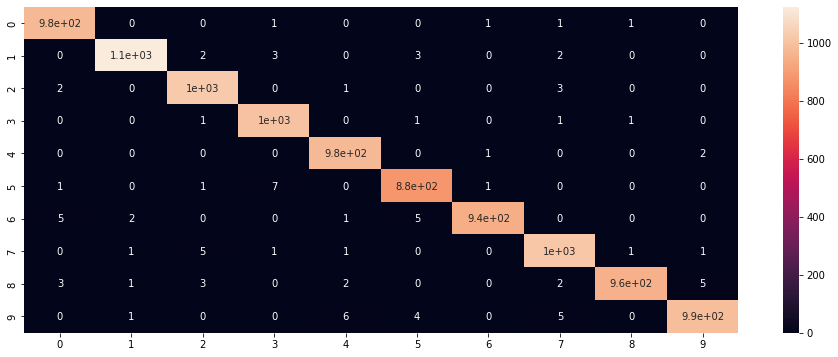

In [14]:
plt.figure(figsize=[16,6])
ax = sns.heatmap(a,annot=True)
plt.show()